<a href="https://colab.research.google.com/github/Jibrangit/DL_Assignments/blob/HW5/HW5_saving_Wts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Note in Colab you can type "pip install" directly in the notebook
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt                                                     # Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 6 Shirt


(28, 28)

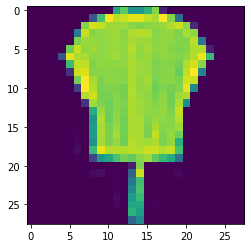

In [ ]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 56
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])
np.shape(x_train[img_index])

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


x_train shape: (40000, 28, 28, 1) y_train shape: (40000, 10, 10, 10, 10)
40000 train set
5000 validation set
10000 test set


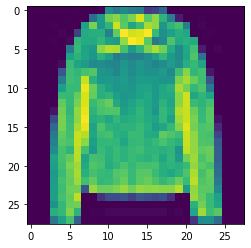

In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)
x_train_actual = x_train
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

plt.imshow(x_train_actual[img_index, :, :, 0])

In [ ]:
model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(tf.keras.layers.Activation(activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              11076608  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 11,087,498
Trainable params: 11,087,498
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=1,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer])

1719/1719 [==============================] - 173s 100ms/step - loss: 0.9770 - accuracy: 0.6863 - val_loss: 0.4898 - val_accuracy: 0.8364

Epoch 00001: val_loss improved from inf to 0.48984, saving model to model.weights.best.hdf5


In [ ]:
#Load the weights with the best validation accuracy.
model.load_weights('model.weights.best.hdf5')


In [ ]:
# WB = model.trainable_variables

# W1 = WB.copy()
# W1 = np.array(W1.pop(0))

# B1 = WB.copy()
# B1 = np.array(B1.pop(1))

# W2 = WB.copy()
# W2 = np.array(W2.pop(2))

# B2 = WB.copy()
# B2 = np.array(B2.pop(3))

# W3 = WB.copy()
# W3 = np.array(W3.pop(4))

# B3 = WB.copy()
# B3 = np.array(B3.pop(5))

W1 = model.trainable_variables[0].numpy()
B1 = model.trainable_variables[1].numpy()
W2 = model.trainable_variables[2].numpy()
B2 = model.trainable_variables[3].numpy()
W3 = model.trainable_variables[4].numpy()
B3 = model.trainable_variables[5].numpy()
# print(np.shape(B3))
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/W1.npy',W1)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/B1.npy',B1)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/W2.npy',W2)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/B2.npy',B2)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/W3.npy',W3)
np.save('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/B3.npy',B3)

# Doesnt work
# np.save('/home/jibran/Desktop/DL_Assignments/HW5/W1.npy',W1)
# np.save('/home/jibran/Desktop/DL_Assignments/HW5/B1.npy',B1)
# np.save('/home/jibran/Desktop/DL_Assignments/HW5/W2.npy',W2)
# np.save('/home/jibran/Desktop/DL_Assignments/HW5/B2.npy',B2)
# np.save('/home/jibran/Desktop/DL_Assignments/HW5/W3.npy',W3)
# np.save('/home/jibran/Desktop/DL_Assignments/HW5/B3.npy',B3)


In [ ]:
print(np.shape(B1))

(64,)


In [ ]:
from keras import backend as K
get_layer_output1 = K.function(model.layers[0].input, model.layers[0].output)
get_layer_output2 = K.function(model.layers[0].input, model.layers[1].output)
get_layer_output3 = K.function(model.layers[0].input, model.layers[2].output)
get_layer_output4 = K.function(model.layers[0].input, model.layers[3].output)
get_layer_output5 = K.function(model.layers[0].input, model.layers[4].output)
get_layer_output6 = K.function(model.layers[0].input, model.layers[5].output)

output1 = get_layer_output1(x_train_actual[img_index-1:img_index, :, :, :])
output2 = get_layer_output2(x_train_actual[img_index-1:img_index, :, :, :])
output3 = get_layer_output3(x_train_actual[img_index-1:img_index, :, :, :])
output4 = get_layer_output4(x_train_actual[img_index-1:img_index, :, :, :])
output5 = get_layer_output5(x_train_actual[img_index-1:img_index, :, :, :])
output6 = get_layer_output6(x_train_actual[img_index-1:img_index, :, :, :])

print('Shape of 1st layer output = ', np.shape(output1))
print('Shape of 2nd layer output = ', np.shape(output2))
print('Shape of 3rd layer output = ', np.shape(output3))
print('Shape of 4th layer output = ', np.shape(output4))
print('Shape of 5th layer output = ', np.shape(output5))
print('Shape of 6th layer output = ', np.shape(output6))
                                              

Shape of 1st layer output =  (1, 26, 26, 64)
Shape of 2nd layer output =  (1, 13, 13, 64)
Shape of 3rd layer output =  (1, 13, 13, 64)
Shape of 4th layer output =  (1, 10816)
Shape of 5th layer output =  (1, 1024)
Shape of 6th layer output =  (1, 10)


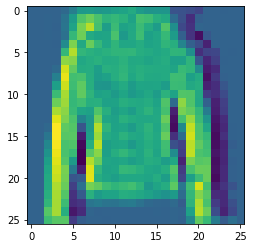

In [ ]:
filter_number=5
conv_img = output1[0, :, :,filter_number]
maxpool_img = output2[0, :, :, filter_number]
relu1_img = output3[0, :, :, filter_number]

flattened_img = output4[0, :]
size = np.size(flattened_img)
length = int(np.sqrt(np.size(flattened_img)))
Deflattened_img = np.reshape(flattened_img, [length, length])

flattened_img2 = output5[0, :]
size2 = np.size(flattened_img2)
length2 = int(np.sqrt(np.size(flattened_img2)))
Deflattened_img2 = np.reshape(flattened_img2, [length2, length2])

plt.imshow(conv_img)
# plt.imshow(maxpool_img)
# plt.imshow(relu1_img)
# plt.imshow(Deflattened_img)
# plt.imshow(Deflattened_img2)

In [ ]:
def visualize(X, title):
    print('Img before reshaping: ',X)
    size = np.size(X)
    X = np.reshape(X, [size, 1])
    length = int(np.sqrt(np.size(X)))
    New_img = np.reshape(X, [length, length])
    print('Img after reshaping: ',New_img)
    plt.imshow(New_img)
    plt.title(title)
    plt.show()

In [ ]:
x_training_reshaped = np.reshape(x_train_actual[img_index, :, :], [784, 1])
print('Shape of x_training sent to numpy is: ', np.shape(x_training_reshaped))
# # Show one of the images from the training dataset
visualize(x_train_actual[img_index], 'Image going into model')
# plt.imshow(x_training_reshaped.reshape(28, 28))
plt.show()
print('=================Tensorflow ends, Numpy begins==========================')

In [ ]:
W = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/W1.npy')
X_tr = x_training_reshaped
b1 = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/B1.npy')
Weight2 = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/W2.npy')
bias2 = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/B2.npy')
Weight3 = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/W3.npy')
bias3 = np.load('/content/drive/MyDrive/Colab Notebooks/DL_Assignments/HW5/B3.npy')

In [ ]:
def conv2D(W, X, b):
    z = np.dot(W, X) +b
    return z

def maxpool(Z, width, stride):
    img_length = int(np.sqrt(len(Z)))                   #=26 in our case
    img = np.reshape(Z, [img_length, img_length])       #=13 in our case
    pooled_img_length = int(img_length/stride)

    Pooled_img = np.empty([pooled_img_length, pooled_img_length])

    for i in range(0, pooled_img_length):
        for j in range(0, pooled_img_length):
            pixels = np.array([img[i*width, j*width], img[i*width, (j*width)+1], img[(i*width)+1, j*width], img[(i*width)+1, (j*width)+1]])
            Pooled_img[i, j] = np.max(pixels)

    return Pooled_img

def relu_function(z):
    h = np.maximum(z, 0)
    return h

def dense(H, W, b):
    z = np.dot(np.transpose(W), H) + b
    return z

def softmax(z):
  return np.exp(z)/np.sum(np.exp(z), axis = 0, keepdims = True)

Weights row =  [0.17002079 0.18259168 0.19909661 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07050799 0.04673887
 0.10857821 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0012424  0.0263751  0.09367296]
Weights row =  [-0.09805868 -0.06211693 -0.07579419  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.07355665  0.02674936
 -0.01822855  0.          0.          0. 

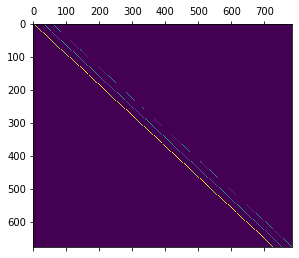

Img before reshaping:  [[ 1.73591487e-02]
 [ 1.79479939e-02]
 [ 1.74283621e-02]
 [ 1.69289872e-02]
 [ 1.75109703e-02]
 [ 6.05397923e-02]
 [ 1.23298487e-01]
 [ 4.49386030e-02]
 [ 1.10368575e-01]
 [ 1.51082822e-01]
 [ 1.22042711e-01]
 [ 9.13390316e-02]
 [ 1.21596681e-01]
 [ 1.08323938e-01]
 [ 1.31997496e-01]
 [ 6.72441126e-02]
 [ 3.54415458e-02]
 [ 3.44895459e-02]
 [ 3.58506739e-03]
 [-5.37456256e-02]
 [-2.96842761e-02]
 [ 1.73034893e-02]
 [ 1.58261173e-02]
 [ 1.73591487e-02]
 [ 1.73591487e-02]
 [ 1.73591487e-02]
 [ 1.73591487e-02]
 [ 1.82688611e-02]
 [ 1.78542442e-02]
 [ 1.82828846e-02]
 [ 3.01218475e-02]
 [ 1.31541120e-01]
 [ 1.44539798e-01]
 [ 1.00986614e-01]
 [ 1.35912567e-01]
 [ 1.63658635e-01]
 [ 1.62945251e-01]
 [ 1.37858425e-01]
 [ 1.32392735e-01]
 [ 1.31494438e-01]
 [ 1.03401038e-01]
 [ 4.78070525e-02]
 [ 9.54361332e-02]
 [ 7.80247570e-02]
 [ 4.60674879e-02]
 [-2.95287748e-02]
 [-2.21089294e-02]
 [ 1.71295907e-02]
 [ 1.82638746e-02]
 [ 1.64741310e-02]
 [ 1.73591487e-02]
 [ 1.735

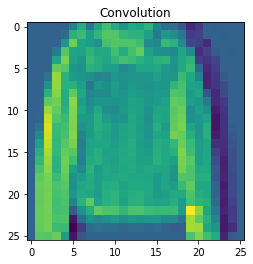

Img before reshaping:  [[ 0.01826886  0.01828288  0.13154112  0.1445398   0.16365863  0.16294525
   0.13239273  0.1319975   0.09543613  0.04606749  0.01730349  0.01826387
   0.01735915]
 [ 0.01863981  0.05089563  0.1797837   0.133406    0.15390177  0.16307421
   0.17204201  0.10713487  0.14063578  0.11364674 -0.02308545  0.01783316
   0.01735915]
 [ 0.01805096  0.17221014  0.18727396  0.14186698  0.12755958  0.15107022
   0.14469098  0.12993689  0.13424692  0.14252891  0.02221991  0.01723297
   0.01807016]
 [ 0.01735915  0.19986256  0.13013576  0.10520241  0.09006616  0.10242219
   0.0972499   0.1070201   0.13661589  0.15366914  0.1024054   0.01027901
   0.01735915]
 [ 0.01735915  0.19162199  0.19417356  0.11530971  0.09065534  0.09777176
   0.10742677  0.10048238  0.17172005  0.16588747  0.11341342 -0.01502507
   0.01735915]
 [ 0.02118664  0.22432284  0.19115683  0.11345784  0.12807413  0.09366279
   0.11513802  0.11893556  0.16899241  0.18288028  0.10986421 -0.03787521
   0.01735915]

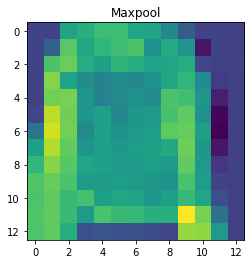

Img before reshaping:  [[0.01826886 0.01828288 0.13154112 0.1445398  0.16365863 0.16294525
  0.13239273 0.1319975  0.09543613 0.04606749 0.01730349 0.01826387
  0.01735915]
 [0.01863981 0.05089563 0.1797837  0.133406   0.15390177 0.16307421
  0.17204201 0.10713487 0.14063578 0.11364674 0.         0.01783316
  0.01735915]
 [0.01805096 0.17221014 0.18727396 0.14186698 0.12755958 0.15107022
  0.14469098 0.12993689 0.13424692 0.14252891 0.02221991 0.01723297
  0.01807016]
 [0.01735915 0.19986256 0.13013576 0.10520241 0.09006616 0.10242219
  0.0972499  0.1070201  0.13661589 0.15366914 0.1024054  0.01027901
  0.01735915]
 [0.01735915 0.19162199 0.19417356 0.11530971 0.09065534 0.09777176
  0.10742677 0.10048238 0.17172005 0.16588747 0.11341342 0.
  0.01735915]
 [0.02118664 0.22432284 0.19115683 0.11345784 0.12807413 0.09366279
  0.11513802 0.11893556 0.16899241 0.18288028 0.10986421 0.
  0.01735915]
 [0.07280867 0.23430783 0.19214925 0.09985316 0.12733363 0.11048178
  0.11751402 0.1252039  0

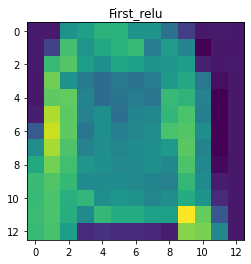

Img before reshaping:  [5.19964587e-05 8.44472816e-04 1.24671386e-01 ... 8.56427030e-02
 6.07391927e-02 1.26628755e-02]
Img after reshaping:  [[5.19964587e-05 8.44472816e-04 1.24671386e-01 ... 7.21915357e-01
  4.30733949e-01 3.39317443e-02]
 [1.93019485e-01 5.80304721e-01 7.38088549e-01 ... 0.00000000e+00
  8.02510985e-02 7.99364001e-02]
 [7.99364001e-02 9.65174185e-02 4.98988752e-02 ... 0.00000000e+00
  0.00000000e+00 7.99364001e-02]
 ...
 [2.66899727e-02 2.74556349e-02 9.70992856e-02 ... 1.14473299e-01
  1.69747376e-01 7.19366094e-02]
 [2.66899727e-02 6.00439749e-02 1.68193886e-01 ... 1.41629453e-02
  7.98589576e-03 1.26628755e-02]
 [1.26628755e-02 8.05433890e-02 1.90530644e-02 ... 8.56427030e-02
  6.07391927e-02 1.26628755e-02]]


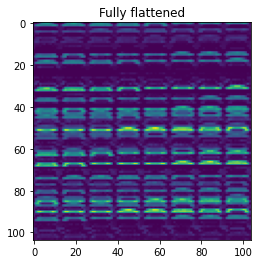

Img before reshaping:  [ 0.27228135 -0.24571572 -0.49253717 ...  0.20954579  0.13982048
  0.8980597 ]
Img after reshaping:  [[ 0.27228135 -0.24571572 -0.49253717 ... -0.48201348 -0.22251036
   0.23004498]
 [ 0.29754863  1.15102809  0.23089108 ...  0.21245183  0.64368493
   1.05595138]
 [-0.14087612 -0.02603698 -0.08608248 ... -0.47917803 -0.13723162
  -0.93558334]
 ...
 [ 0.15400321 -0.05196062  0.0201921  ... -0.80548928  0.17611719
   0.20009706]
 [-0.44751234 -0.91032829 -0.48506462 ...  0.42346094  0.23678184
   0.77063608]
 [-0.24763108 -0.32612307  0.27145143 ...  0.20954579  0.13982048
   0.8980597 ]]


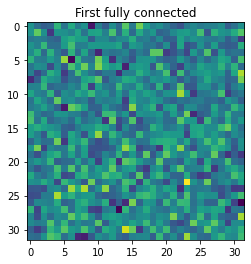

Img before reshaping:  [0.27228135 0.         0.         ... 0.20954579 0.13982048 0.8980597 ]
Img after reshaping:  [[0.27228135 0.         0.         ... 0.         0.         0.23004498]
 [0.29754863 1.15102809 0.23089108 ... 0.21245183 0.64368493 1.05595138]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.15400321 0.         0.0201921  ... 0.         0.17611719 0.20009706]
 [0.         0.         0.         ... 0.42346094 0.23678184 0.77063608]
 [0.         0.         0.27145143 ... 0.20954579 0.13982048 0.8980597 ]]


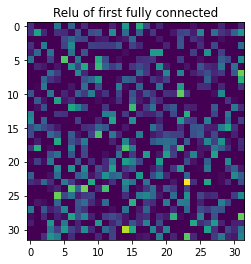

Y_hat of Example# 56  is: [1.51231162e-02 1.29499038e-03 1.09092710e-02 2.98631776e-03
 1.38331265e-04 9.06915728e-01 1.91678765e-02 3.81075247e-03
 3.94812502e-02 1.72365744e-04]
Y_hat label = 5 
Item =  Sandal


In [ ]:
Kernels = {}
Wts_row = {}
WEIGHTS_CONV2D = {}
Z_CONV2D = {}
Z_MAXPOOL = {}
Z_RELU1={}

# print(W)
W1 = W[0, 0, 0, :]
W2 = W[0, 1, 0, :]
W3 = W[0, 2, 0, :]
W4 = W[1, 0, 0, :]
W5 = W[1, 1, 0, :]
W6 = W[1, 2, 0, :]
W7 = W[2, 0, 0, :]
W8 = W[2, 1, 0, :]
W9 = W[2, 2, 0, :]

for i in range(0, 64):
    Kernels['K'+str(i)] = [[W1[i], W2[i], W3[i]],
                           [W4[i], W5[i], W6[i]],
                           [W7[i], W8[i], W9[i]]]

# print(Kernels['K'+str(42)])

for i in range(0, 64):
    V = Kernels['K' + str(i)]
    Zeros = np.zeros(25)
    Wts_row['Wts' + str(i)] = np.concatenate([V[0], Zeros, V[1], Zeros, V[2]])
    print('Weights row = ', Wts_row['Wts' + str(i)])

Wts_row_length = np.size(Wts_row['Wts' + str(56)])      #All 'weights' rows are of same length
# print('Length of weights row: ', Wts_row_length)

#Generates indices where kernel has to be applied to get feature maps
Nos = np.arange(784)                      #Slicing of last 2 columns of indices of the image as the kernel doesnt reach there.
Nos = np.reshape(Nos, [28, 28])
Nos = Nos[:-2, :-2]
Nos = np.ndarray.flatten(Nos)
print(np.shape(Nos))

for j in range(0, 64):
    WEIGHTS_CONV2D['w_conv' + str(j)] = np.concatenate([Wts_row['Wts' + str(j)], np.zeros(784 - Wts_row_length)])
    for i in range(1, 676):
        INDEX = Nos[i]
        ROW = np.concatenate([np.zeros(INDEX), Wts_row['Wts' + str(j)], np.zeros(784 - Wts_row_length - INDEX)])
        WEIGHTS_CONV2D['w_conv' + str(j)] = np.vstack([WEIGHTS_CONV2D['w_conv' + str(j)], ROW])

plt.matshow(WEIGHTS_CONV2D['w_conv' + str(0)]/np.max(WEIGHTS_CONV2D['w_conv' + str(0)]), 'Weights0')
plt.show()

for i in range(0, 64):
    Wi = WEIGHTS_CONV2D['w_conv' + str(i)]
    Z_CONV2D['z_conv2d'+str(i)] = conv2D(Wi, X_tr, b1[i])
filter_number = 5                                                    #Set the filter numebr here for visualization
visualize(Z_CONV2D['z_conv2d'+str(filter_number)], 'Convolution')

for i in range(0, 64):
    Z_MAXPOOL['z_maxpool'+str(i)] = maxpool(Z_CONV2D['z_conv2d'+str(i)], 2, 2)
visualize(Z_MAXPOOL['z_maxpool5'], 'Maxpool')

for i in range(0, 64):
    Z_RELU1['z_relu_one'+str(i)] = relu_function(Z_MAXPOOL['z_maxpool'+str(i)])
visualize(Z_RELU1['z_relu_one5'], 'First_relu')

Z_FLATTENED = np.ndarray.flatten(Z_RELU1['z_relu_one'+str(0)])
for i in range(1, 64):
    Z_FLATTENED = np.concatenate([Z_FLATTENED, np.ndarray.flatten( Z_RELU1['z_relu_one'+str(i)])])
visualize(Z_FLATTENED, 'Fully flattened')

# print(np.shape(Z_FLATTENED))
Z_DENSE1 = dense(Z_FLATTENED, Weight2, bias2)
visualize(Z_DENSE1,'First fully connected')

Z_RELU2 = relu_function(Z_DENSE1)
visualize(Z_RELU2, 'Relu of first fully connected')

Z_DENSE2 = dense(Z_RELU2, Weight3, bias3)

SOFTMAX = softmax(Z_DENSE2)
print('Y_hat of Example#',img_index,' is:',SOFTMAX)
print('Y_hat label =', np.argmax(SOFTMAX), '\nItem = ',fashion_mnist_labels[np.argmax(SOFTMAX)])